In [3]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing

def fullRead(pathToTable, sep, anthro = False):

  df_renamed = pd.read_csv(pathToTable, sep = sep, encoding = "latin_1")


  # reading and merging    
  
  if anthro == True:
    df_anthro = pd.read_csv("data/chronicAnthropometricCardiovascularData.csv", sep=";", decimal=",")
    df_renamed = df_renamed.merge(df_anthro)

    # separating by time moment and renaming

    df_renamed["Weight"] = ""
    df_renamed["BMI"] = ""
    df_renamed["Fat"] = ""
    df_renamed["CVRI"] = ""
    df_renamed["Bpmin"] = ""
    df_renamed["Bpmax"] = ""
    df_renamed["Frec"] = ""

    for i in range(len(df_renamed)):

        if df_renamed.loc[i]["Time"] == "Initial":
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso inicial"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Inicial"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa inicial"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV inicial"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin inicial"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax inicial"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec inicial"] 
                
        if df_renamed.loc[i]["Time"] == "Final":
        
            df_renamed.loc[i,"Weight"] = df_renamed.loc[i]["Peso final"]
            df_renamed.loc[i,"BMI"] = df_renamed.loc[i]["IMC Final"]
            df_renamed.loc[i,"Fat"] = df_renamed.loc[i]["Grasa final"]
            df_renamed.loc[i,"CVRI"] = df_renamed.loc[i]["IRCV Final"] 
            df_renamed.loc[i,"Bpmin"] = df_renamed.loc[i]["Bpmin final"] 
            df_renamed.loc[i,"Bpmax"] = df_renamed.loc[i]["Bpmax final"] 
            df_renamed.loc[i,"Frec"] = df_renamed.loc[i]["Frec final"] 
        
    df_renamed.drop(columns = ["Peso inicial", "Peso final", "Delta Peso", "Talla", "IMC Inicial", "IMC Final", "Delta IMC", "Grasa inicial", "Grasa final", "Delta Grasa", "IRCV Final", "IRCV inicial", "Bpmin final", "Bpmin inicial", "Bpmax final", "Bpmax inicial", "Frec final", "Frec inicial",], inplace=True )
  
  df_renamed.drop(columns = ["Unnamed: 0", "grouping"], inplace=True )
  df_renamed.fillna(0, inplace=True)
  return df_renamed

def scaling(df_read):
   
   scaler = preprocessing.MinMaxScaler()
   numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
   df_read[numCols] = scaler.fit_transform(df_read[numCols])
   return df_read

df1_anthro = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= True))
df1_metab = scaling(fullRead("data/urineAnt_ord.csv",  sep = ",", anthro= False))

C:\Users\dres2\AppData\Local\Temp\ipykernel_18028\2043229750.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns
C:\Users\dres2\AppData\Local\Temp\ipykernel_18028\2043229750.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  numCols = df_read.select_dtypes(include=np.number).drop("numVol",1).columns


# 1. Structure investigation 

## shape (rows, cols):  (250, 32)
## types of variables
float64    28
object      3
int64       1
dtype: int64
## Non-numerical features
       Sweetener     Time  Sex
count        250      250  250
unique         3        2    2
top           SU  Initial  MAN
freq          84      125  142
## Numerical values


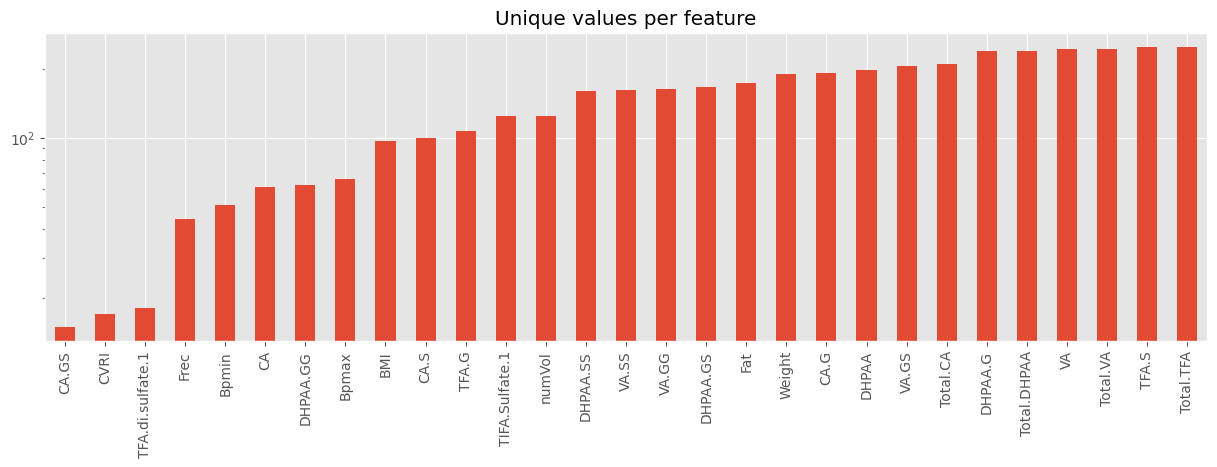

In [21]:
def strInv(df_scal):

    print("## shape (rows, cols): ",df_scal.shape)
    print("## types of variables")
    print(pd.value_counts(df_scal.dtypes))
    print("## Non-numerical features")
    print(df_scal.describe(exclude="number"))
    print ("## Numerical values")
    unique_values = df_scal.select_dtypes(include="number").nunique().sort_values()

    # Plot information with y-axis in log-scale
    unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

strInv(df1_anthro)

# 2. Quality Investigation

No missing values because we have imputed to 0

## Duplicates
You seem to have 0 duplicates in your database.
## Global view (numerical)


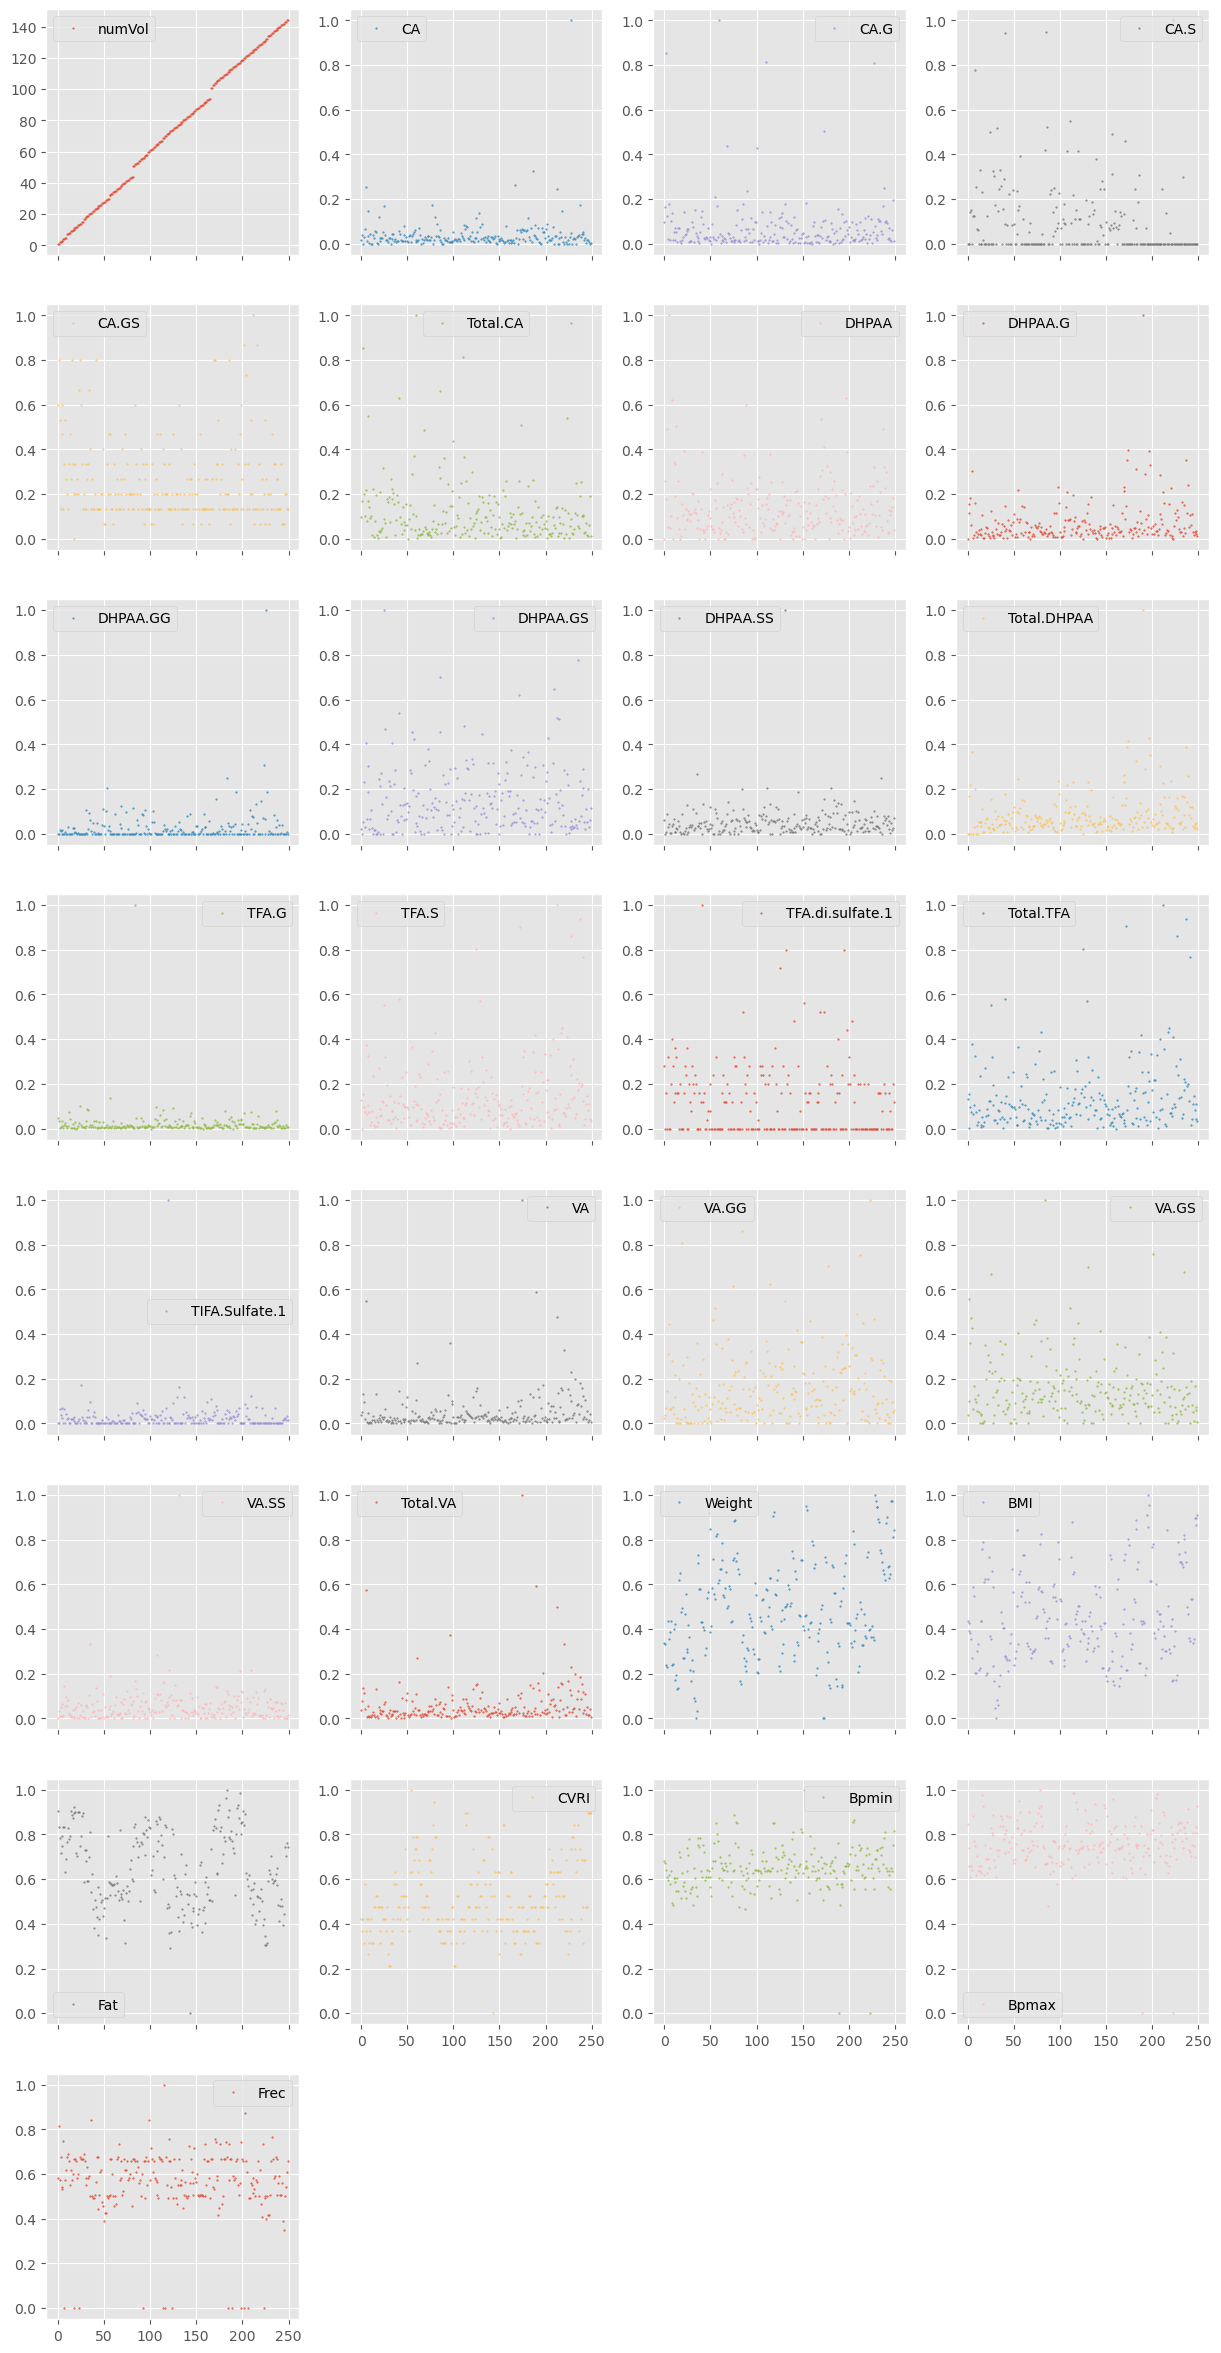

In [28]:
def qualInv (df_scal):
    print("## Duplicates")
    n_duplicates = df_scal.duplicated().sum()
    print(f"You seem to have {n_duplicates} duplicates in your database.")
    print("## Global view (numerical)")
    df_scal.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);
    

qualInv(df1_anthro)

# 3. Content investigation 

# histogram for numerical:


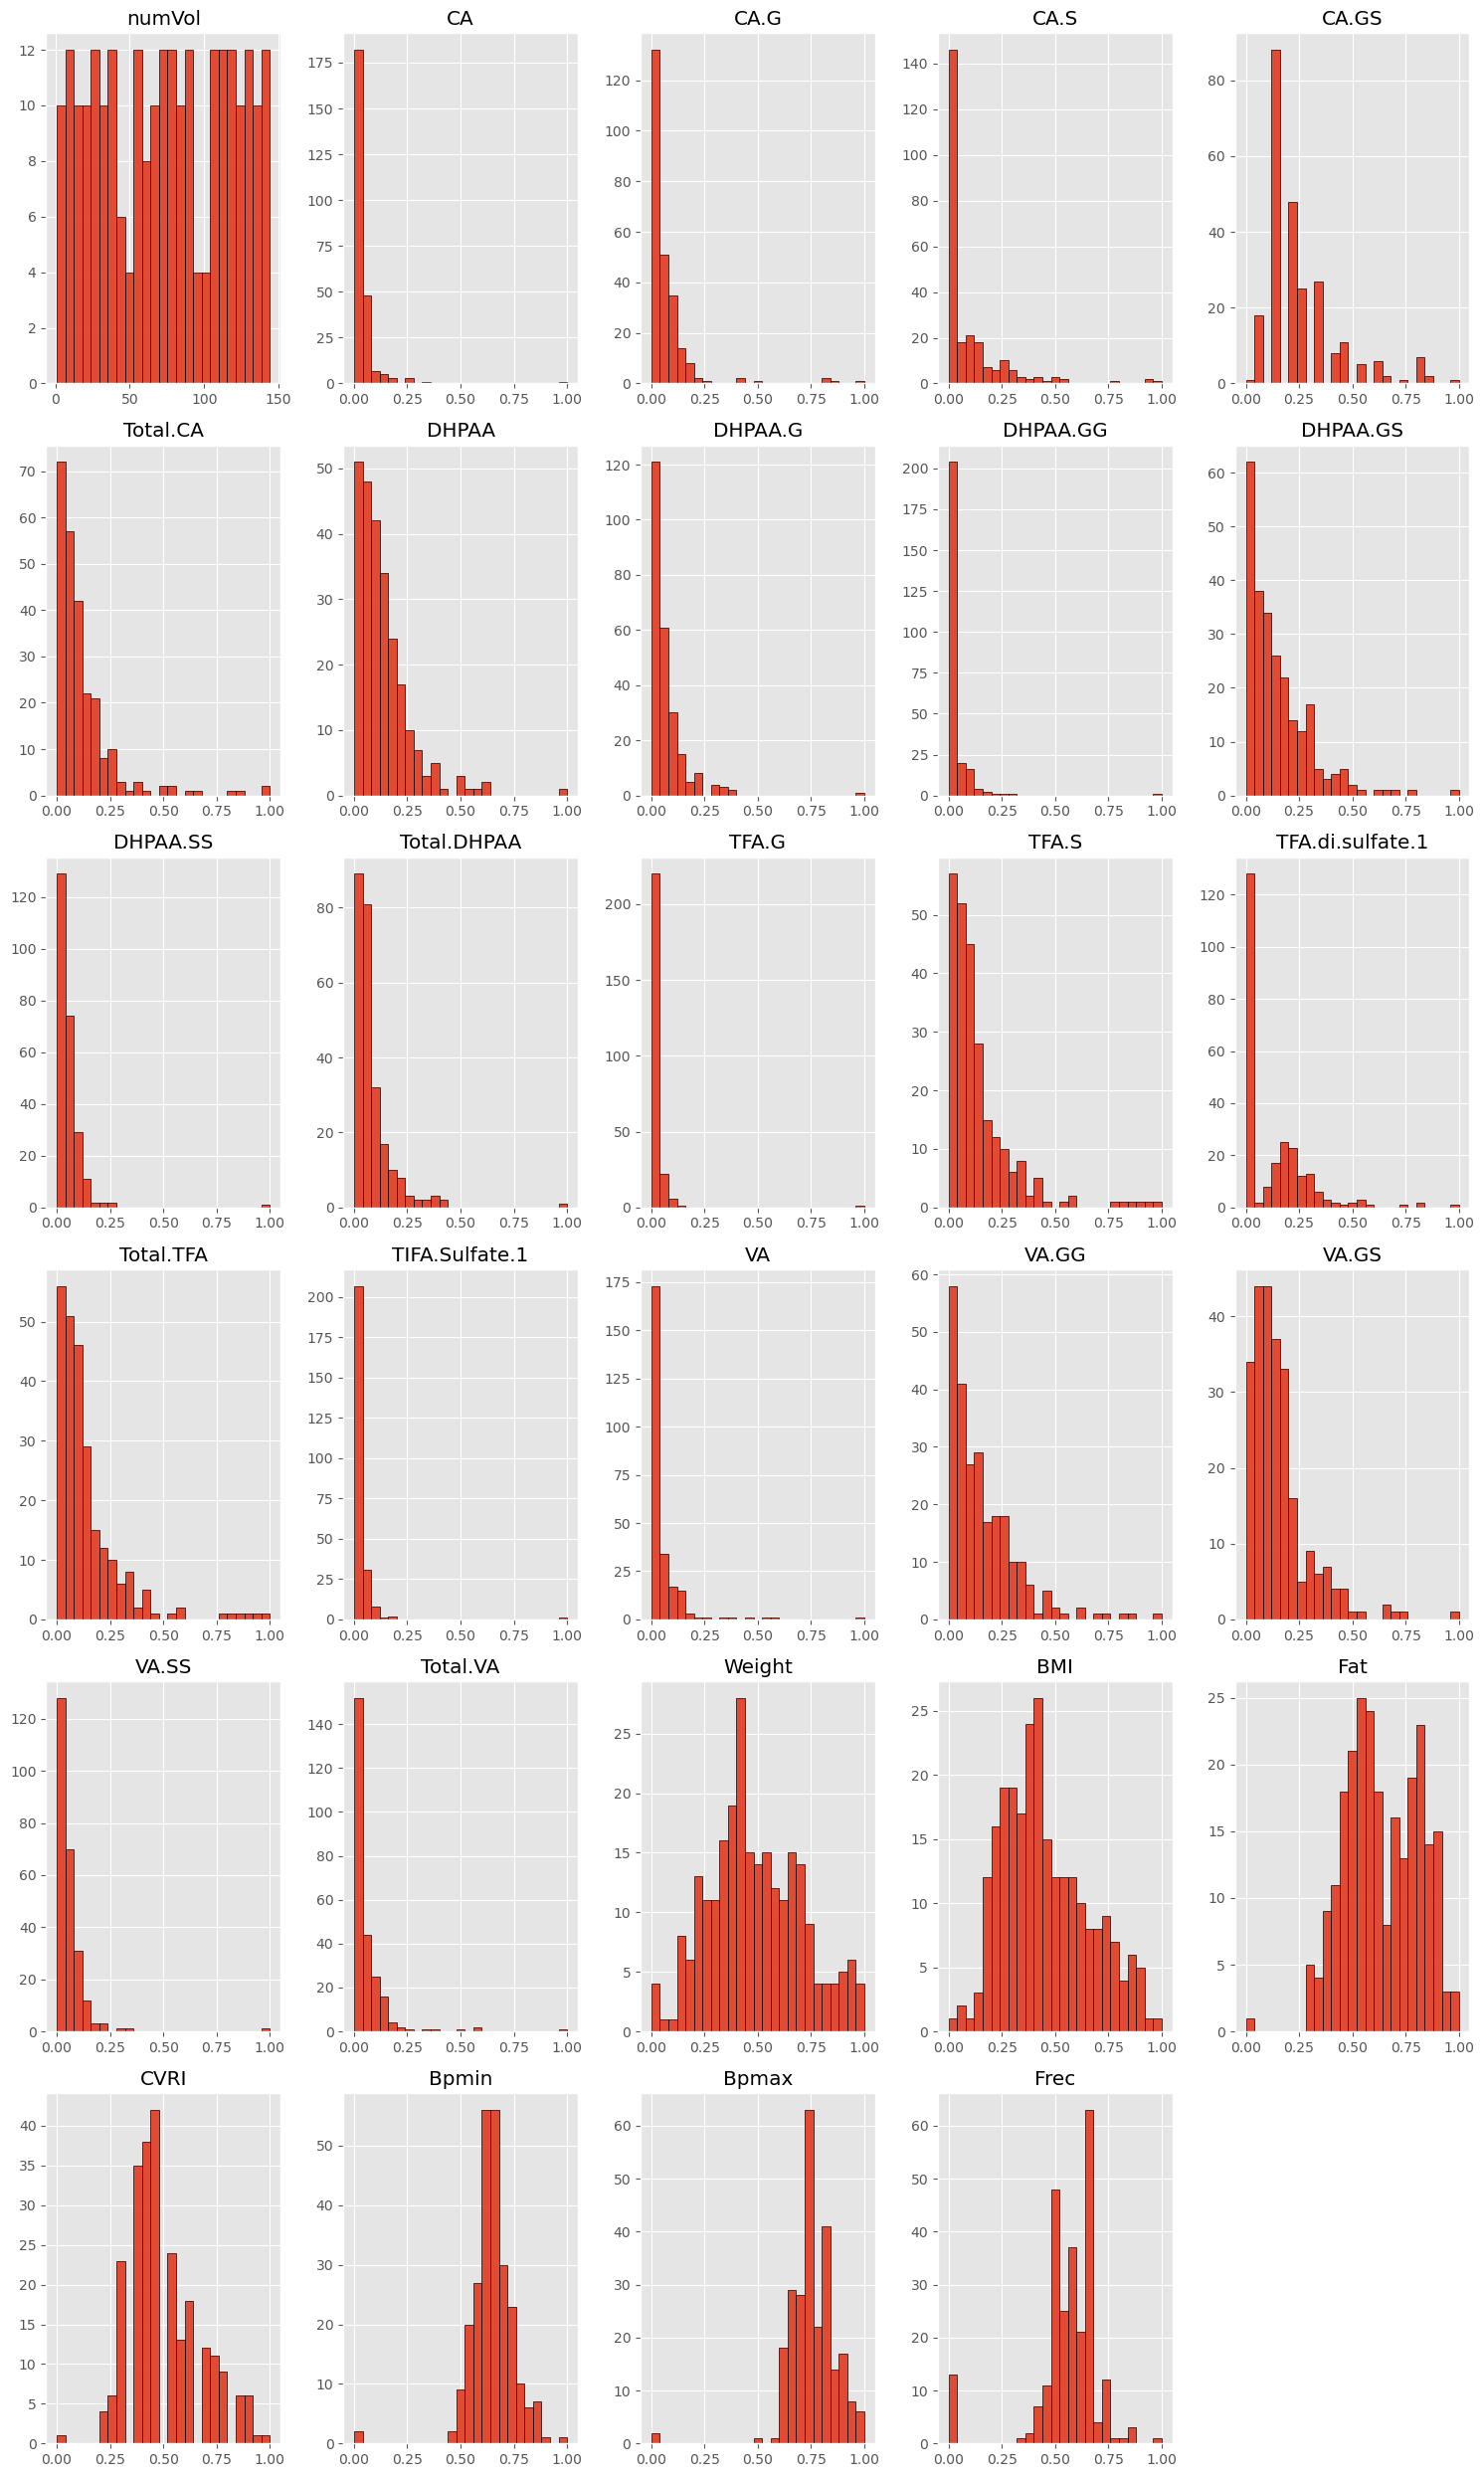

In [35]:
def contInv1 (df_scal):
    print("# histogram for numerical:")
    df_scal.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
    plt.tight_layout()

def contInv2 (df_scal):
    # Collects for each feature the most frequent entry
    most_frequent_entry = df_scal.mode()

    # Checks for each entry if it contains the most frequent entry
    df_freq = df_scal.eq(most_frequent_entry.values, axis=1)

    # Computes the mean of the 'is_most_frequent' occurrence
    df_freq = df_freq.mean().sort_values(ascending=False)

    # Show the 5 top features with the highest ratio of singular value content
    print(df_freq.head())

    # Visualize the 'df_freq' table
    df_freq.plot.bar(figsize=(15, 4))

contInv1(df1_anthro)


Total.TFA    0.008
numVol       0.004
DHPAA.G      0.004
Weight       0.004
VA.SS        0.004
dtype: float64


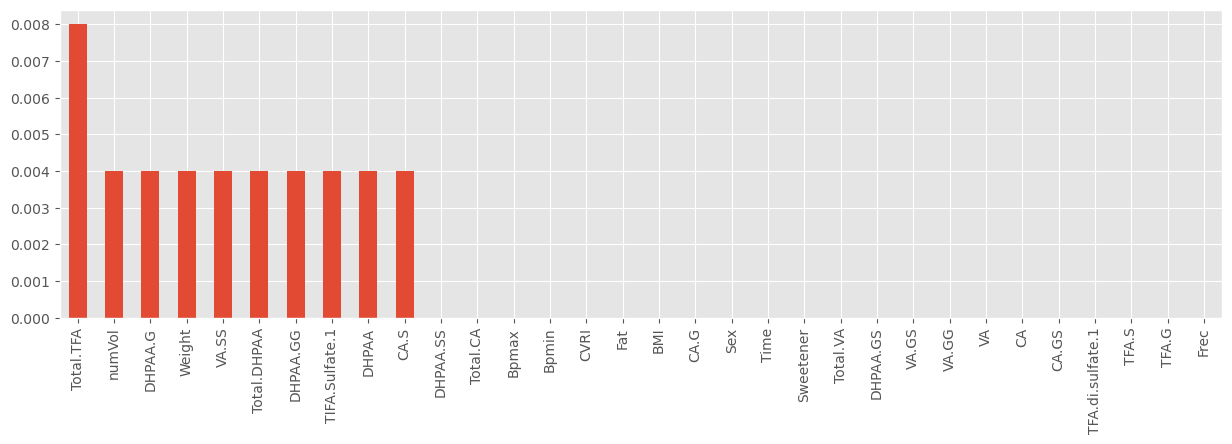

In [36]:
contInv2(df1_anthro)

# 3.2 Feature patterns

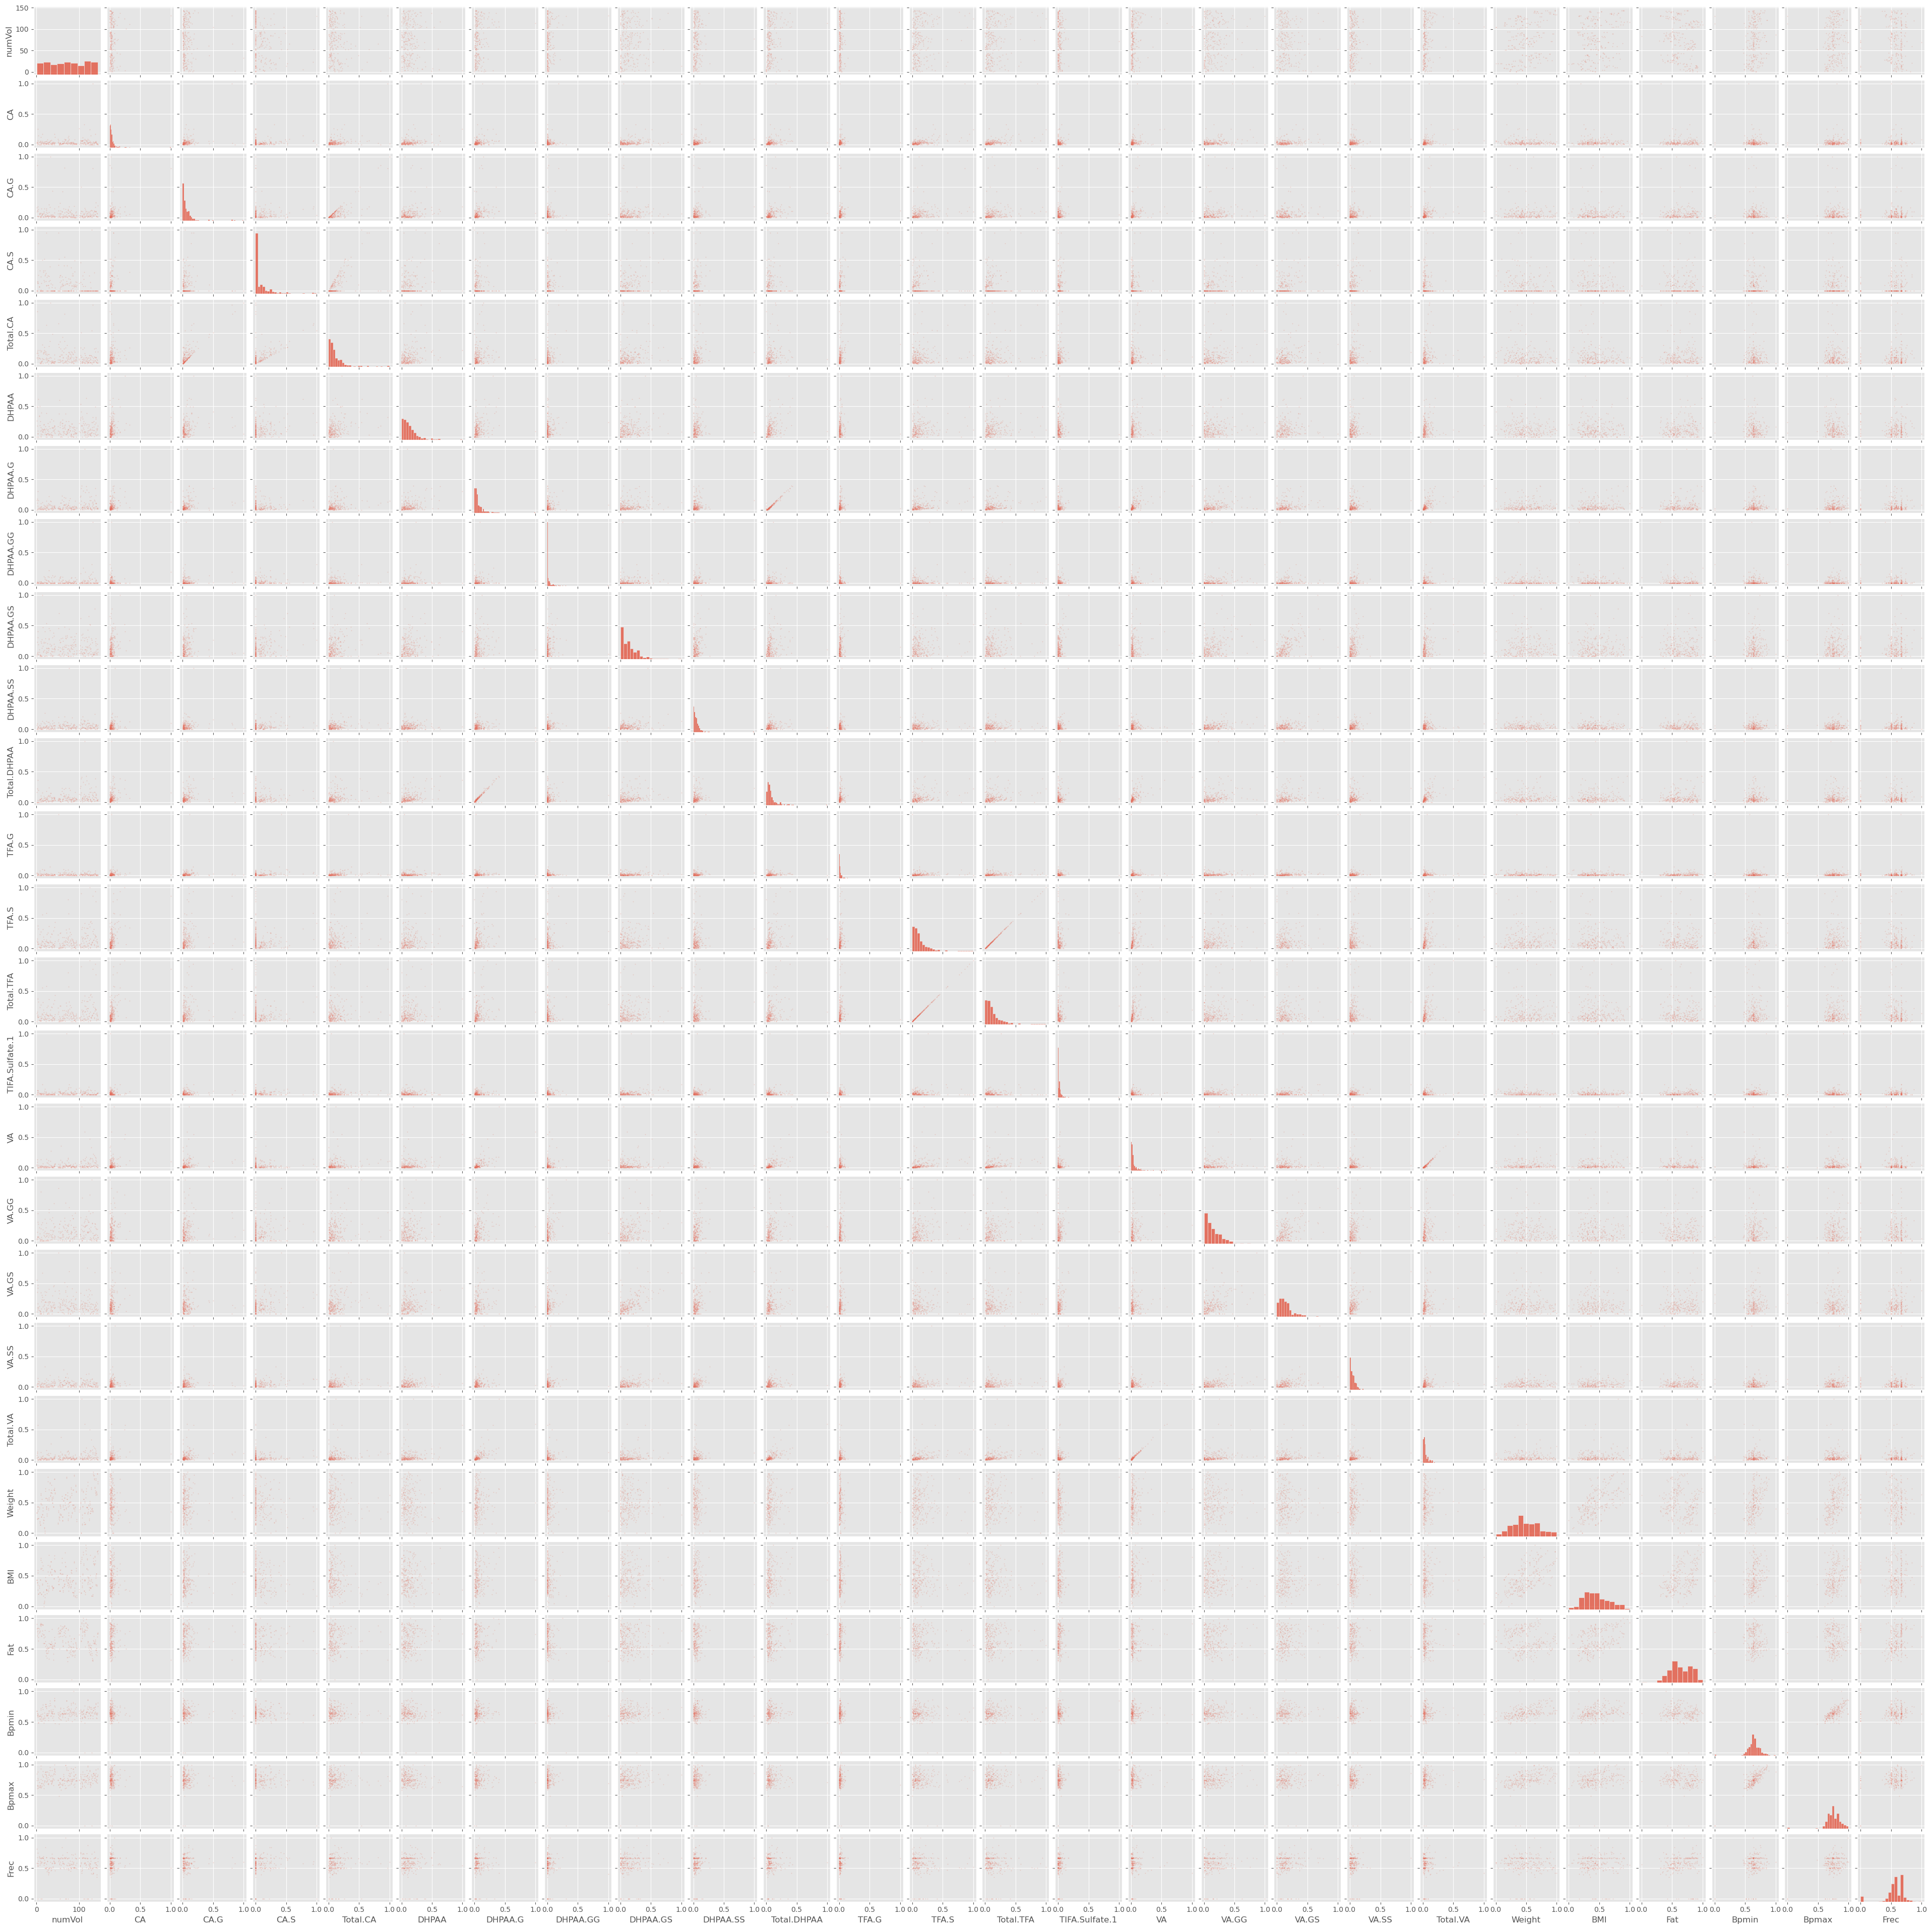

In [41]:
def contPatterns(df_scal):
    cols_continuous = df_scal.select_dtypes(include="number").nunique() >= 25
    df_continuous = df_scal[cols_continuous[cols_continuous].index]

    sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2})

contPatterns(df1_anthro)




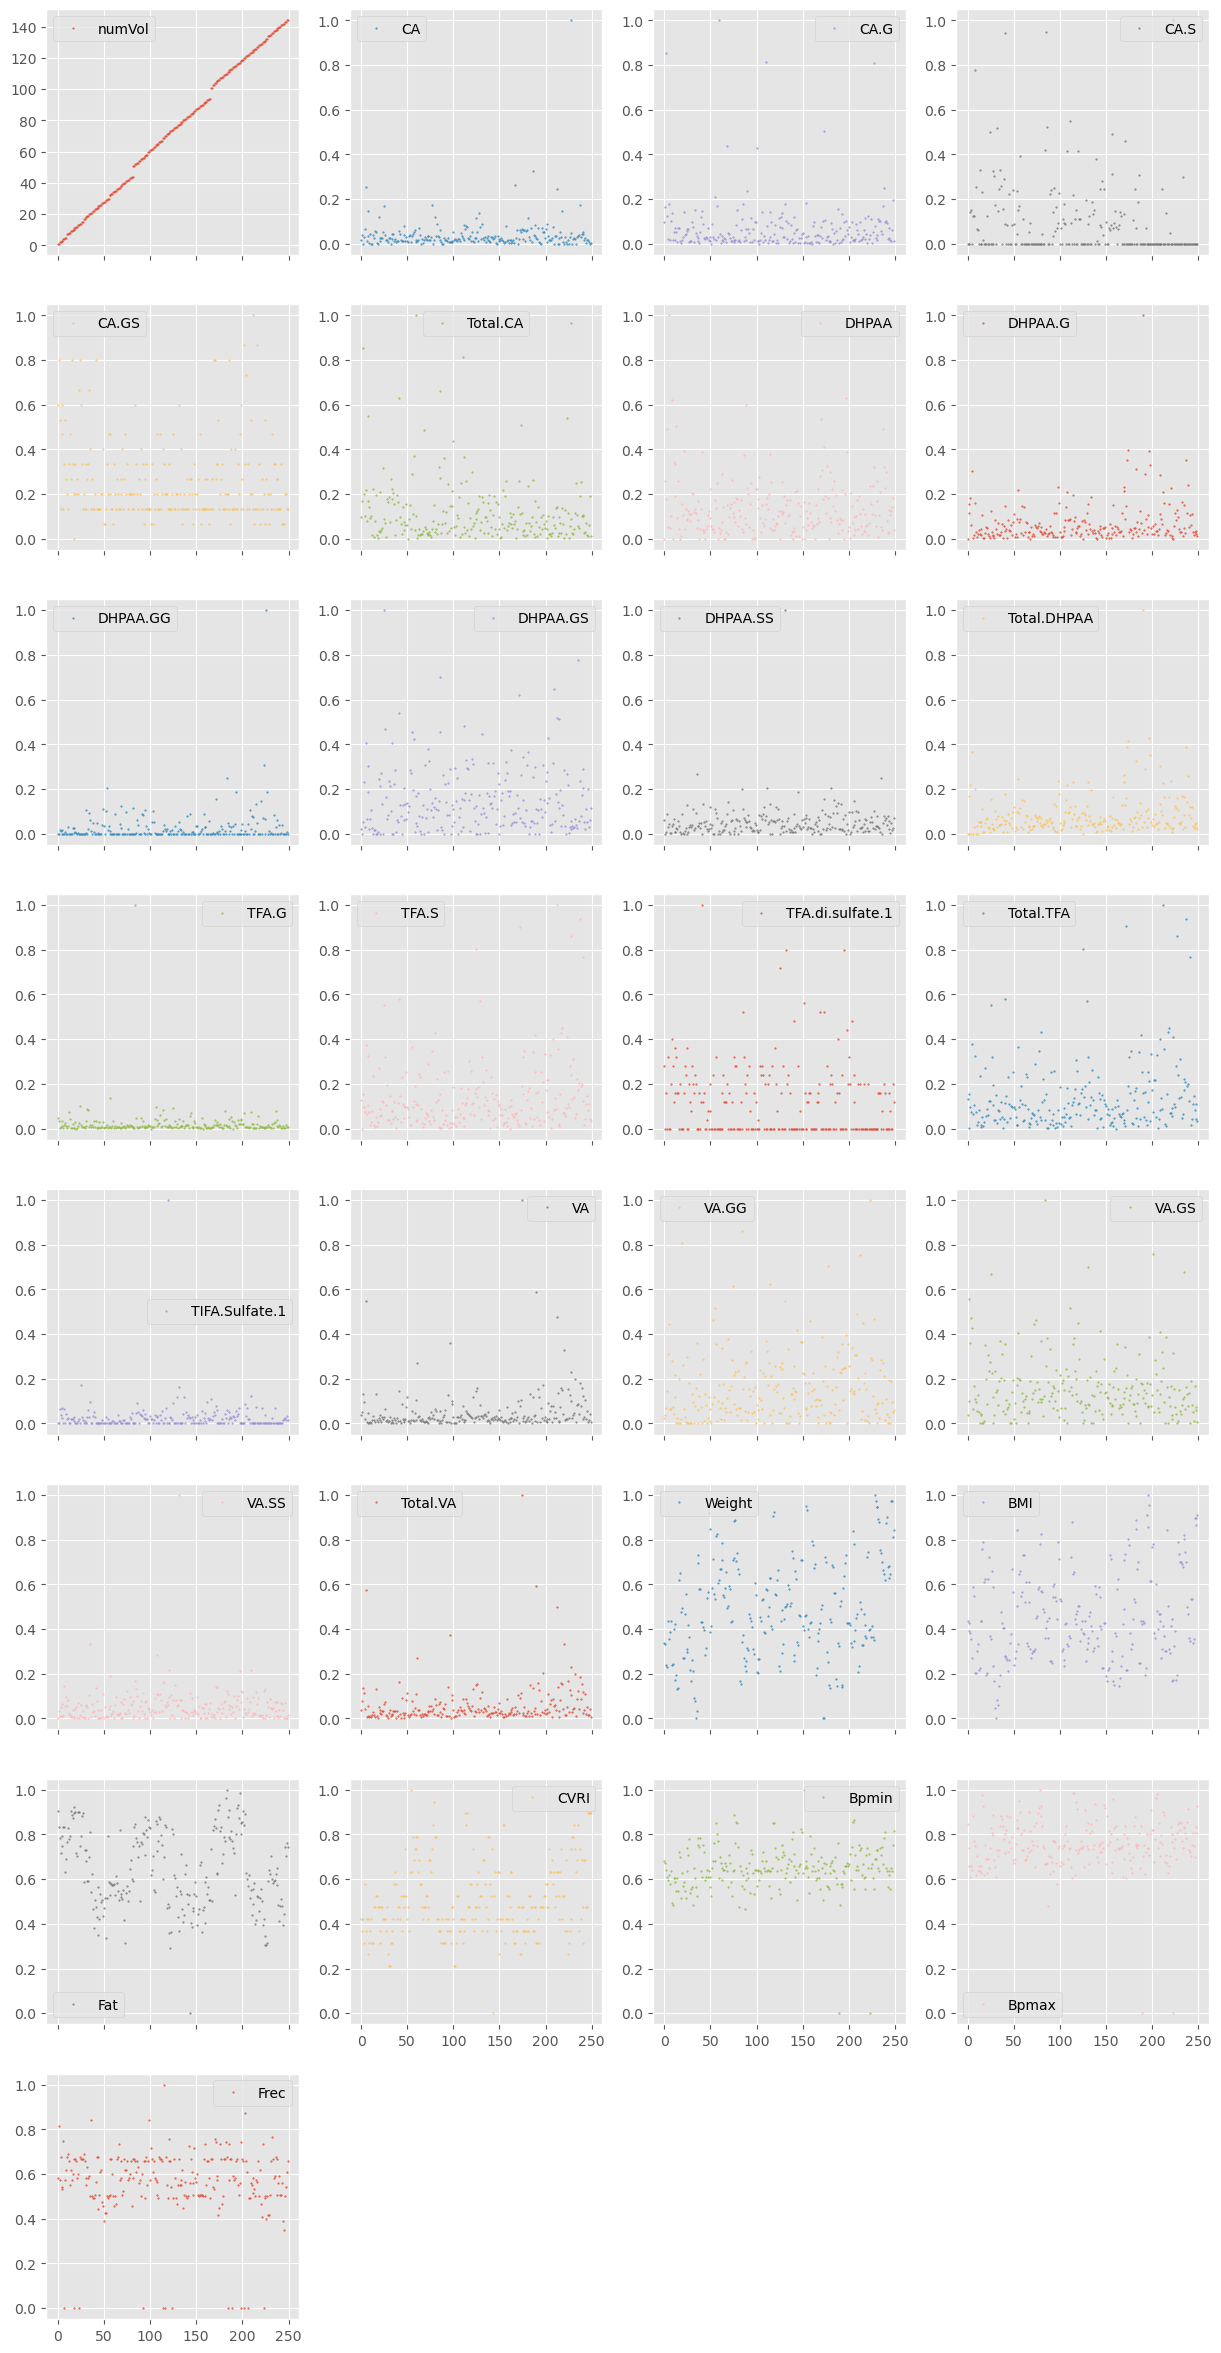

In [6]:
df1.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [ ]:
# more quality

3.1. Feature distribution

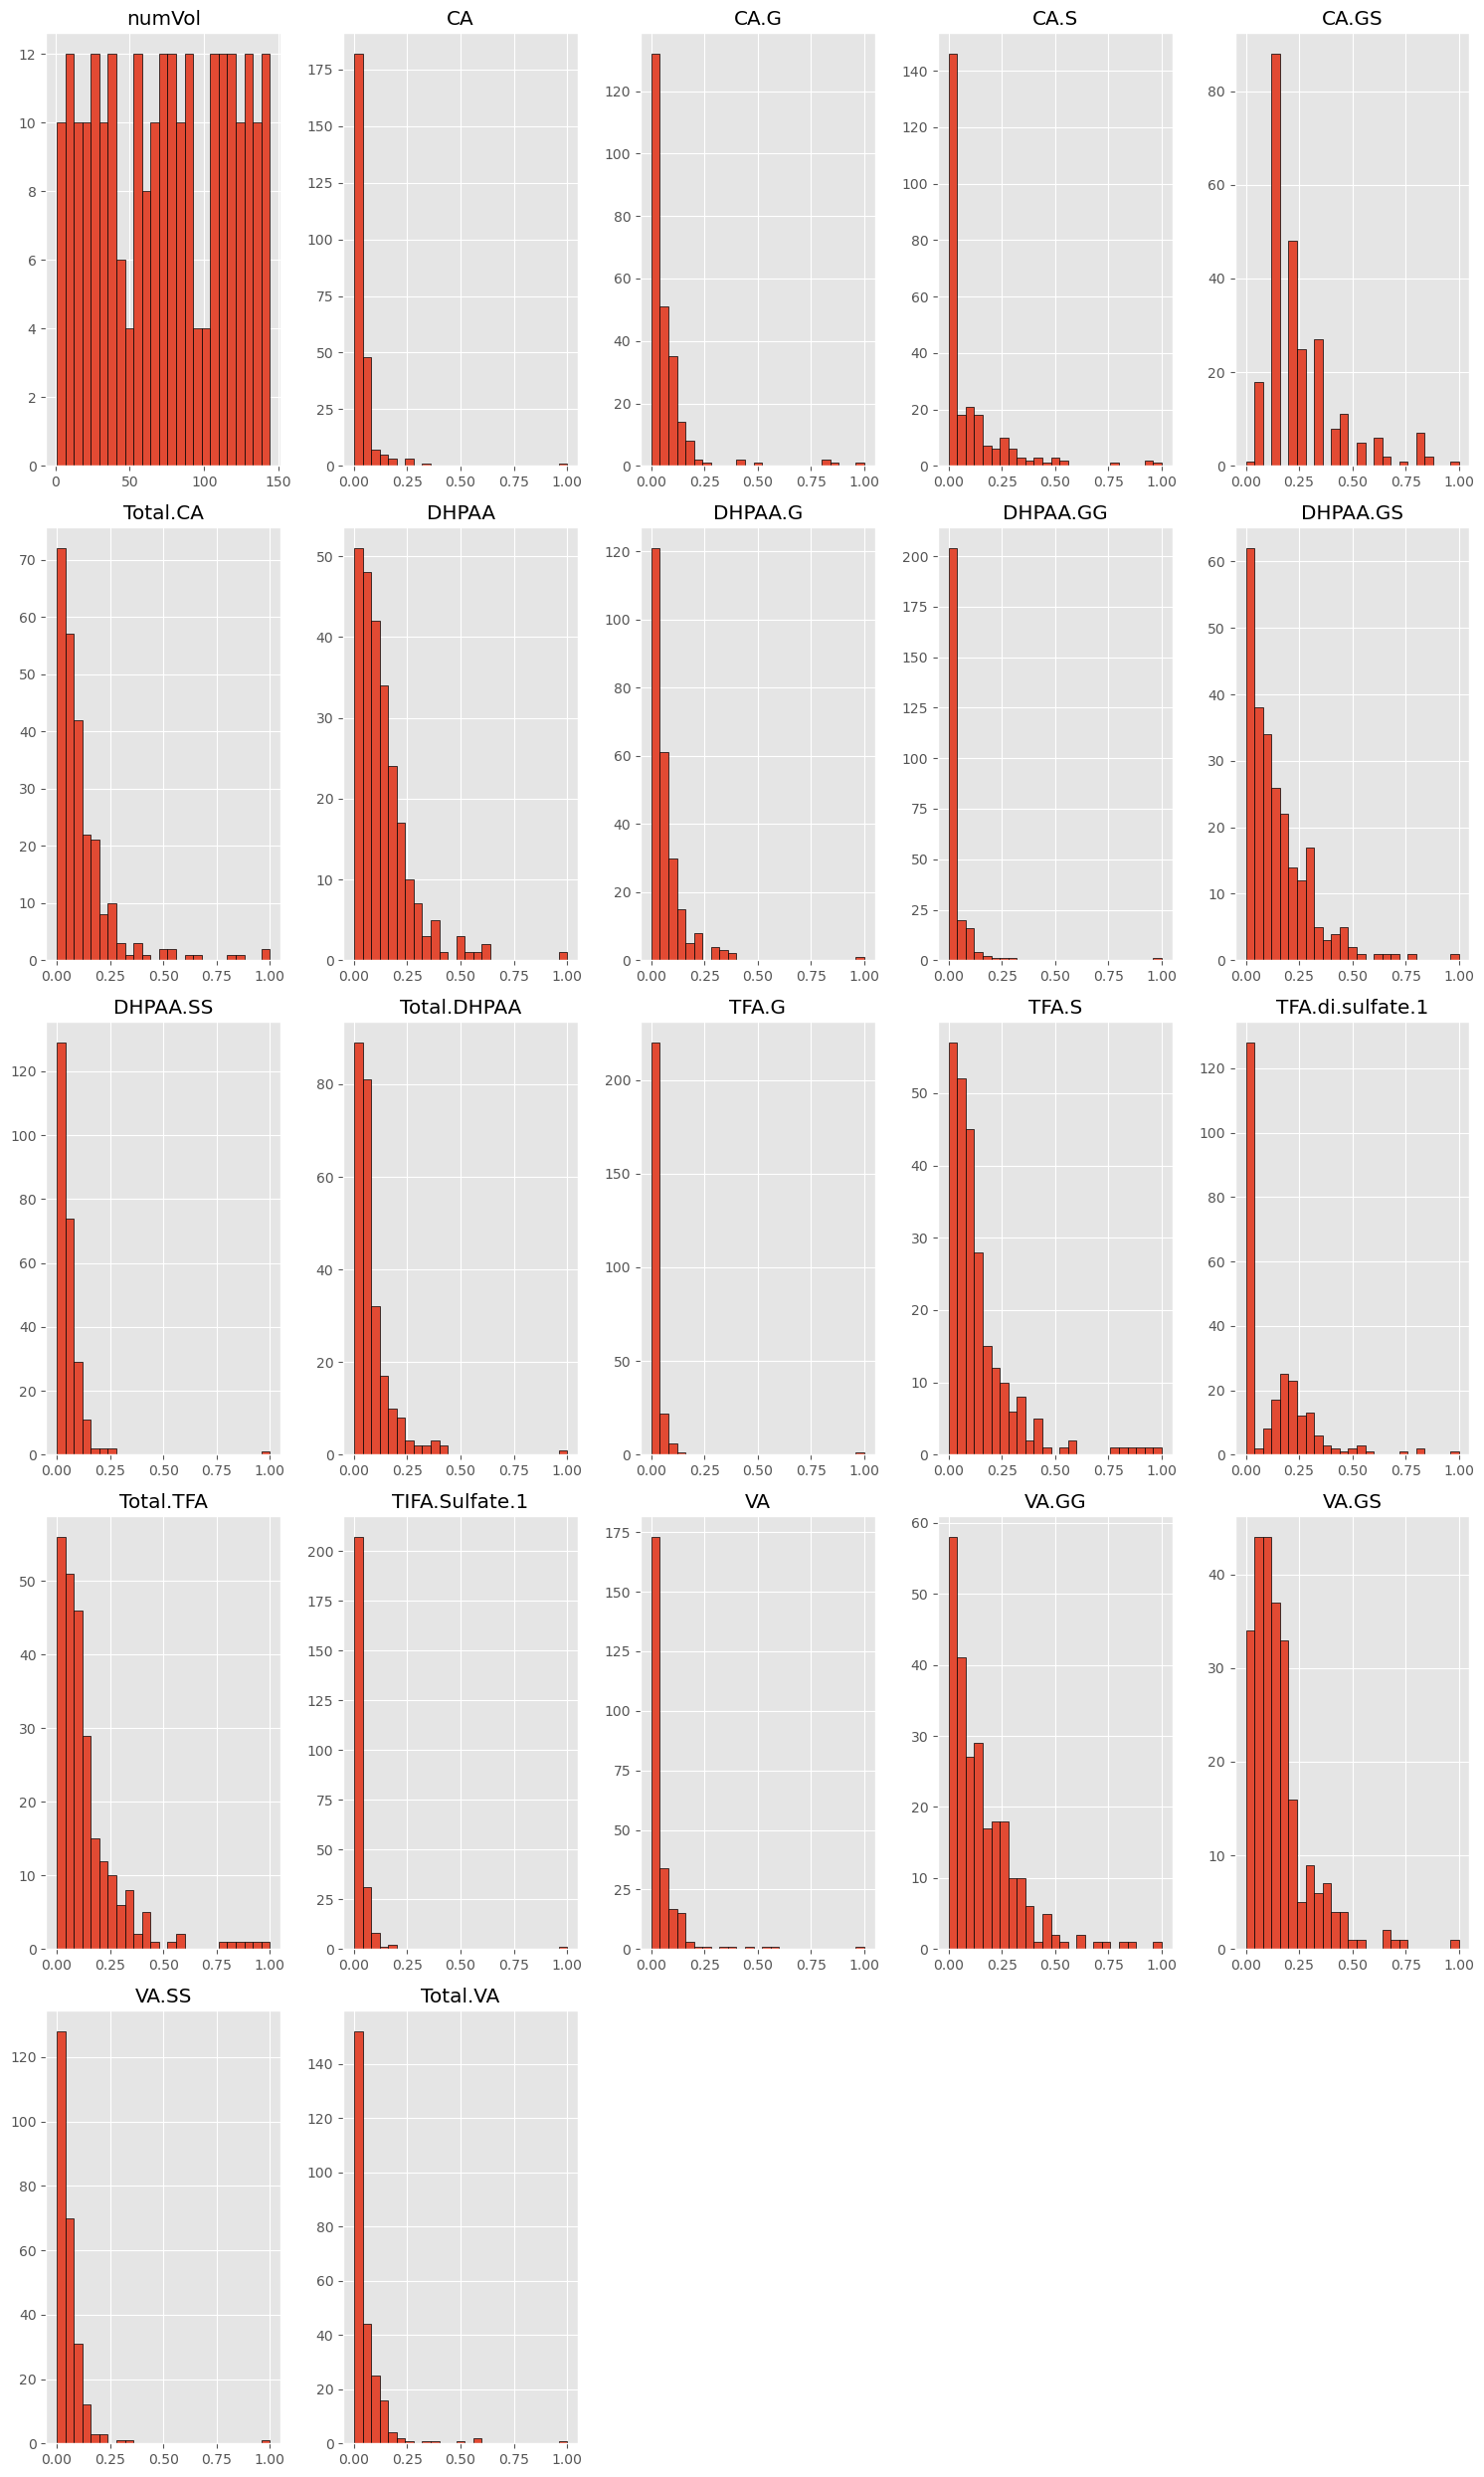

In [9]:
# Plots the histogram for each numerical feature in a separate subplot
df1_metab.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Bla bla bla 

3.3 Correlations

In [13]:
df_corr = df1_anthro.corr(method="pearson")


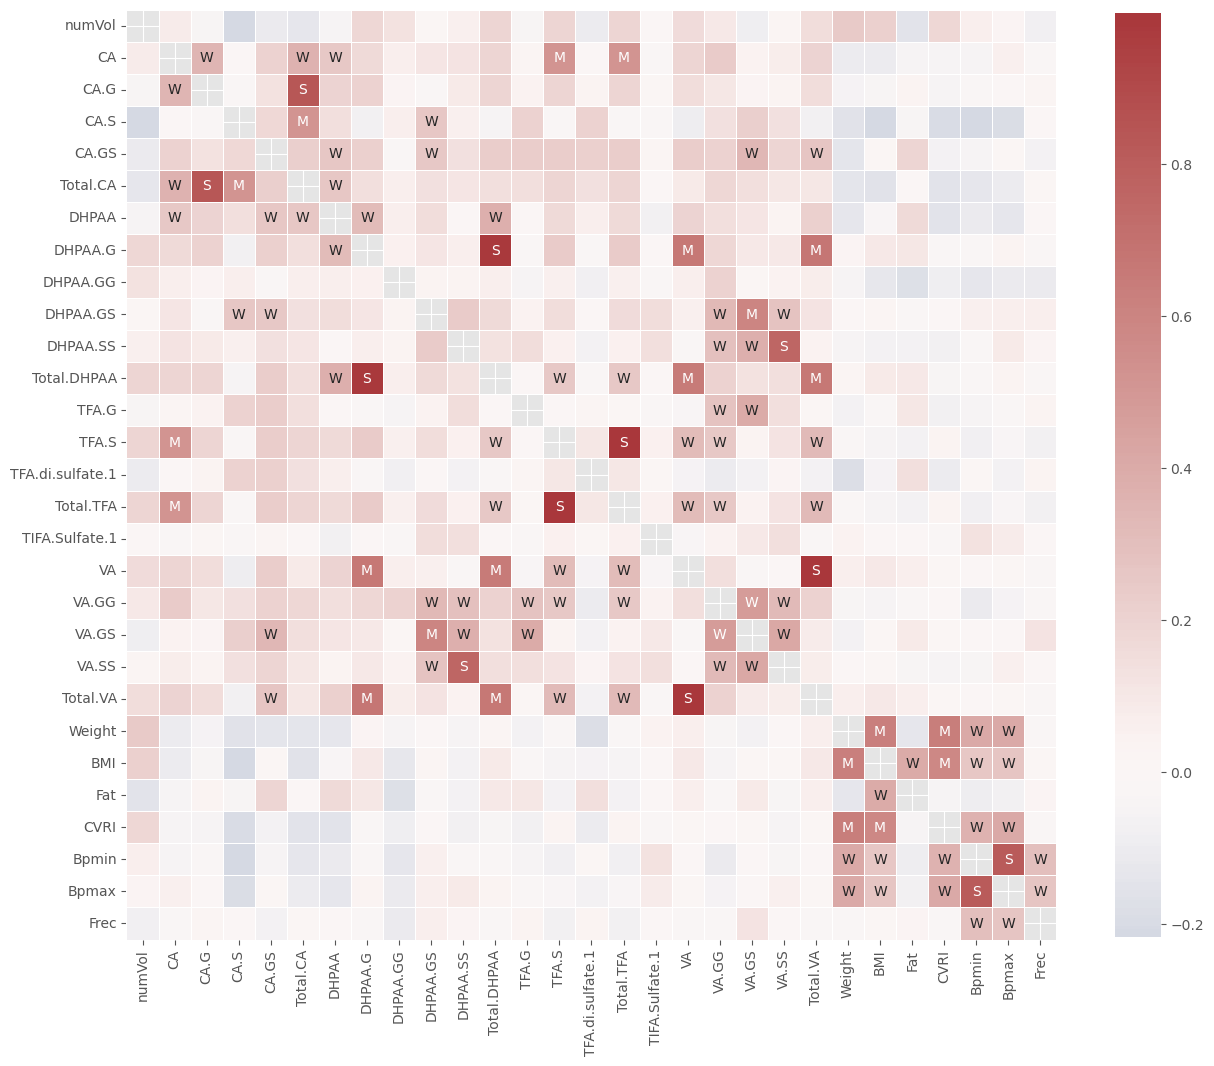

In [14]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [22]:
pd.set_option('display.max_rows', None)

#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
print(df_corr_stacked)

Bpmin             CA.S               -0.216050
BMI               CA.S               -0.209916
CA.S              numVol             -0.206785
CVRI              CA.S               -0.196840
Bpmax             CA.S               -0.191286
Weight            TFA.di.sulfate.1   -0.187065
Fat               DHPAA.GG           -0.170599
Weight            CA.S               -0.159235
BMI               Total.CA           -0.154546
CVRI              Total.CA           -0.154154
Fat               numVol             -0.149612
CVRI              DHPAA              -0.145727
Weight            Total.CA           -0.143202
                  CA.GS              -0.142029
Total.CA          numVol             -0.138659
Bpmin             DHPAA.GG           -0.138426
Fat               Weight             -0.137848
Bpmax             DHPAA              -0.136872
Bpmin             Total.CA           -0.133382
Weight            DHPAA              -0.130553
BMI               DHPAA.GG           -0.122579
Bpmin        